In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

from mindstorm import dsmplot
from mindstorm import statplot
from tesser import tasks
from tesser import figures

bids_dir = os.environ['TESSER_BIDS']
fig_dir = os.path.join(os.environ['TESSER_FIGURES'], 'plots')
os.makedirs(fig_dir, exist_ok=True)

# Load grouping task final positions

In [2]:
group = tasks.load_group(bids_dir)
group.head()

,object,object_type,community,dim1,dim2,run,subject
0,1,central,1,8,14,1,100
1,2,central,1,5,14,1,100
2,3,boundary,1,5,12,1,100
3,4,boundary,2,8,13,1,100
4,5,central,2,8,12,1,100


# Plot individual positions

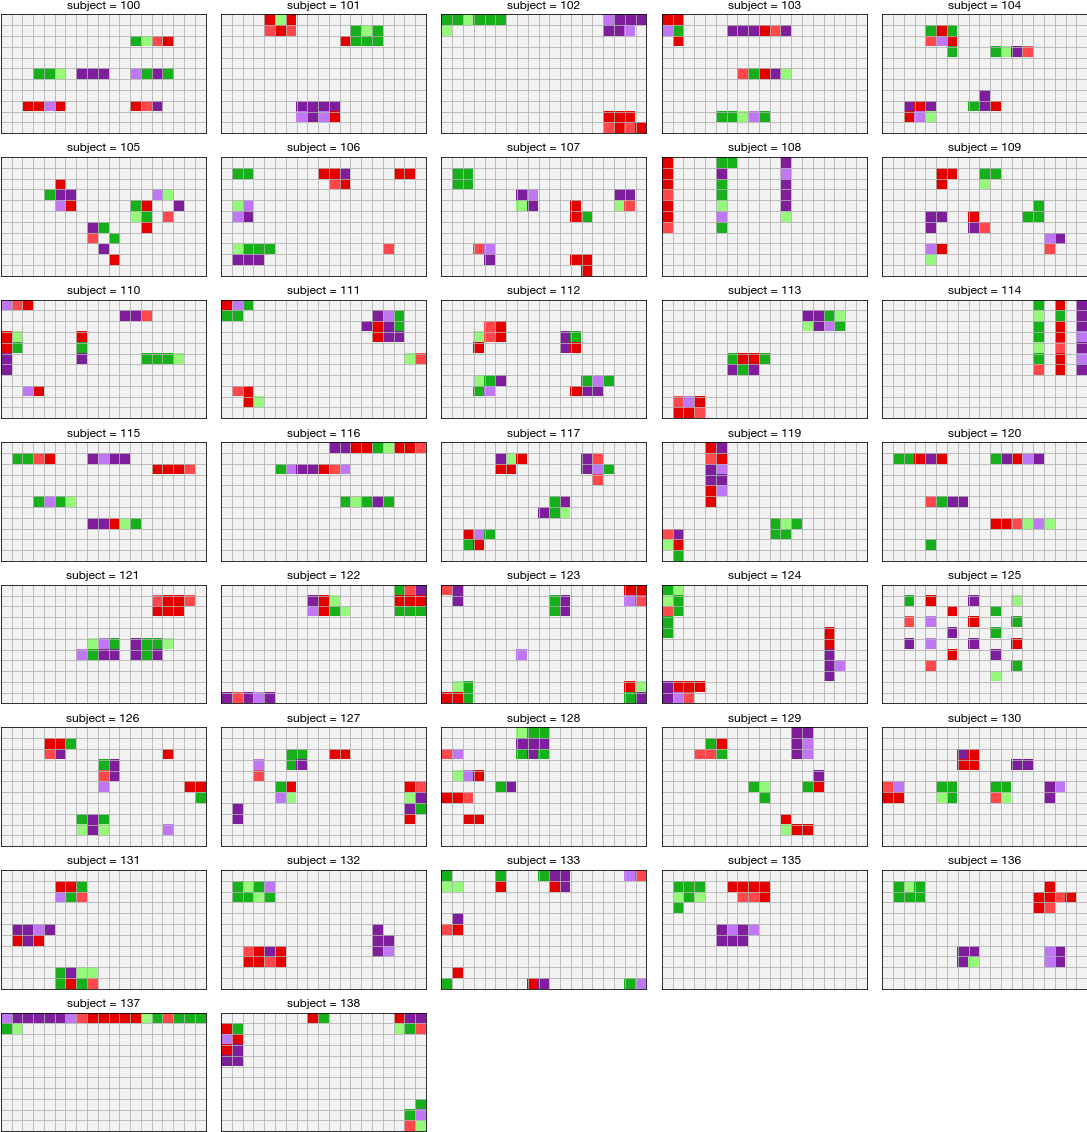

In [3]:
g = sns.FacetGrid(data=group, col='subject', col_wrap=5, aspect=17/11, height=2)
g.map_dataframe(figures.plot_group_mat);
g.savefig(os.path.join(fig_dir, 'grouping.pdf'))

# Plot individual distance matrices

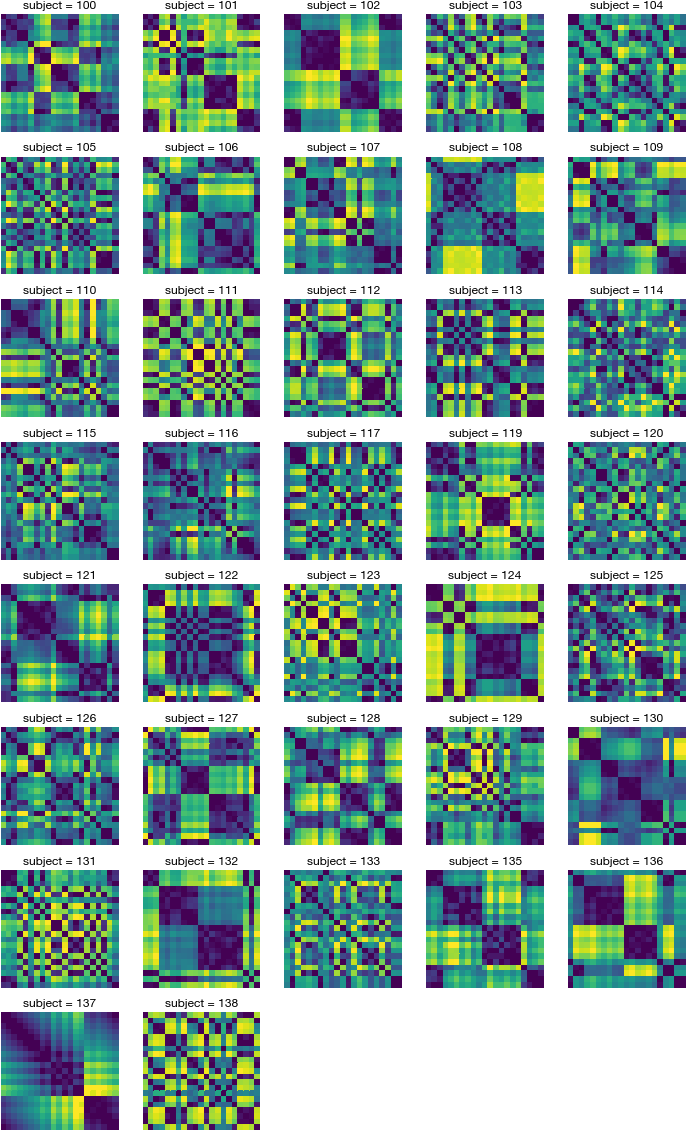

In [4]:
g = sns.FacetGrid(data=group, col='subject', col_wrap=5, height=2)
g.map_dataframe(dsmplot.plot_rep_as_dsm, distance='euclidean');
g.savefig(os.path.join(fig_dir, 'grouping_euclidean.pdf'))

# Test for an effect of community

In [3]:
res = tasks.group_distance(group)
pg.ttest(res['across'], res['within'], paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.554845,36,two-sided,0.000058,"[1.0, 2.61]",0.853919,406.56,0.999004


In [4]:
res

,subject,within,across
0,100,6.453109,6.303163
1,101,3.275216,7.544530
2,102,1.903457,13.488641
3,103,5.924018,6.538673
4,104,6.119553,5.797296
5,105,5.478375,5.187283
6,106,4.991468,9.113032
7,107,6.913436,8.225806
8,108,3.651095,7.159988
9,109,5.955939,6.459205


In [6]:
light = [
    (240 / 256, 96 / 256, 130 / 256),
    (238 / 256, 191 / 256, 202 / 256),
]
dark = [
    (237 / 256, 38 / 256, 81 / 256),
    (238 / 256, 155 / 256, 175 / 256),
]
sns.color_palette(light + dark)

[(0.9375, 0.375, 0.5078125),
 (0.9296875, 0.74609375, 0.7890625),
 (0.92578125, 0.1484375, 0.31640625),
 (0.9296875, 0.60546875, 0.68359375)]

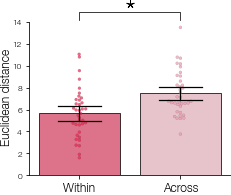

In [14]:
fig, ax = plt.subplots(figsize=(3.5, 3))
flat = pd.melt(
    res, id_vars='subject', value_vars=['within', 'across'], var_name='pair', 
    value_name='distance'
)
statplot.plot_swarm_bar(flat, x='pair', y='distance', light=light, dark=dark, ax=ax)
x = sorted([p.get_x() + p.get_width() / 2 for p in ax.patches])
y = flat.groupby('pair')['distance'].max().to_list()
offset = 0.05 * np.diff(ax.get_ylim())
statplot.plot_sig([x[0], x[1]], [y[0], y[1]], offset, ax=ax)
ax.set(ylim=(0, 16), yticks=np.arange(0, 16, 2))
ax.spines['left'].set_bounds(0, 14)
ax.set(xticklabels=['Within', 'Across'], ylabel='Euclidean distance');
ax.yaxis.set_label_coords(-.08, 0.45)
fig.savefig(os.path.join(fig_dir, 'grouping_distance.pdf'))

In [8]:
pg.ttest(res['within'], res['across'], paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-4.554845,36,two-sided,0.000058,"[-2.61, -1.0]",0.853919,406.56,0.999004


In [9]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.11.1

mindstorm : 0.8.1
scipy     : 1.4.1
matplotlib: 3.4.2
seaborn   : 0.11.1
numpy     : 1.18.1
tesser    : 0.1.0
pandas    : 1.2.5
pingouin  : 0.3.12

